# **Importing the Libraries and Data** #

I imported the necessary libraries to complete this project. That includes pandas, numpy, and matplotlib. After doing so, I read in my two CSV files.

In [157]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data from csv files

stats = pd.read_csv('videos-stats.csv')
comments = pd.read_csv('comments.csv')

# **Showing the Dataframes** #

First, I wanted to show the two separate dataframes I created with the two CSV files I used for this project. I displayed the head of the first and second dataframes.

In [158]:
# Show first dataframe 

stats.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [159]:
# Show second dataframe

comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Merging and Joining the Data** #

Afterward, I used pandas to merge the data on the Video ID column. Because my data is about YouTube videos and the comments of those videos, the unique video ID was the best choice for merging the data. I wanted to maintain columns from both dataframes so I did an outer join. Afterward, I once again displayed the head of the dataframe.

In [160]:
# Merge and join dataframes into a single dataframe

df3 = pd.merge(stats, comments, on='Video ID', how='outer')

df3.head()

,Unnamed: 0_x,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Unnamed: 0_y,Comment,Likes_y,Sentiment
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,1,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2,I will forever acknowledge this channel with t...,161.0,2.0
3,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,3,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,4,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Cleaning the Dataframe** #

This is where I started to clean up my data. I began doing so by dropping some columns that I knew I wouldn't need. After my merge and join, the original indexes were labeled as "Unnamed" so I remvoed both of those columns to make the dataframe less messy. I also removed the "Published At" column because I did not need it for this project.

In [161]:
# Drop unneeded columns from dataframe 

youtube_data = df3.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Published At'])

youtube_data.head()

,Title,Video ID,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


After dropping the unneeded columns, I decided to rename some other columns. Both CSV files had columns of data labeled "Likes." In the first CSV file, "Likes" referred to video likes and in the second dataframe, the "Likes" column referred to likes associated with comments on the videos. In an effort to make the joined dataframe more organized and clear, I renamed the two "Likes" columns to "Video Likes" and "Comment Likes."

In [162]:
# Rename columns

youtube_data.rename(columns={'Likes_x': 'Video Likes', 'Likes_y': 'Comment Likes' , 'Comments' : '# of Comments'}, inplace=True)
youtube_data.head()

,Title,Video ID,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


Finally, I wanted to drop any null values from my dataframe. So first I used the isna() function to detect any missing values and noticed that there were some in four different columns.

In [163]:
youtube_data.isna().sum()

Title             0
Video ID          0
Keyword           0
Video Likes      20
# of Comments    20
Views            20
Comment           1
Comment Likes     0
Sentiment         0
dtype: int64

To fix that, I used the dropna() function to remove any rows with missing values from the Video Likes, # of Comments, Views, and Comment columns because the majority of my analysis would be using those columns of data. Then I used "true" for the inplace parameter because I only need to work with my one dataframe. For the purposes of my project, it was fine to override the original. 

In [164]:
youtube_data.dropna(how='any', subset=['Video Likes', '# of Comments', 'Views', 'Comment'], inplace=True)
youtube_data.head()

,Title,Video ID,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


I used the isna() function once again to make sure all missing values were gone and my check came back with all 0s.

In [165]:
youtube_data.isna().sum()

Title            0
Video ID         0
Keyword          0
Video Likes      0
# of Comments    0
Views            0
Comment          0
Comment Likes    0
Sentiment        0
dtype: int64

This was the dataframe I ended up with. I ultimately named it youtube_data.

In [166]:
youtube_data.head()

,Title,Video ID,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


# **Measuring the Sentiment of Comments** #

One thing I wanted to analyze in this project was sentiment amongst the comments left on the YouTube videos. I wanted to see how often neutral or neutral to positive comments were left in comparison to negative comments. My assumption was that neutral and neutral to positive comments would outweigh the negative comments. I realize that a topic of discussion in this day and age is the negativity of social media and internet forums. However, I've always assumed that negative comments were often a vocal minority rather than a majority. I created a pie chart to visualize the proportion of comments by sentiment and it seems that my assumption was correct.

I will note that in the original dataframe, sentiment of comments was given a numerical value.

0.0 = negative comments
1.0 = neutral
2.0 = neutral

I labeled 2.0 as neutral to positive after reviewing the comments given that particular numerical value. That is why the slices in my pie chart are labeled as such. It's difficult to numerically judge written comments so I understand why neutral was originally applied to both 1.0 and 2.0 comments. However, some were given 2.0 for a reason and it was seemingly because they were closer to positive than comments labeled as 1.0.

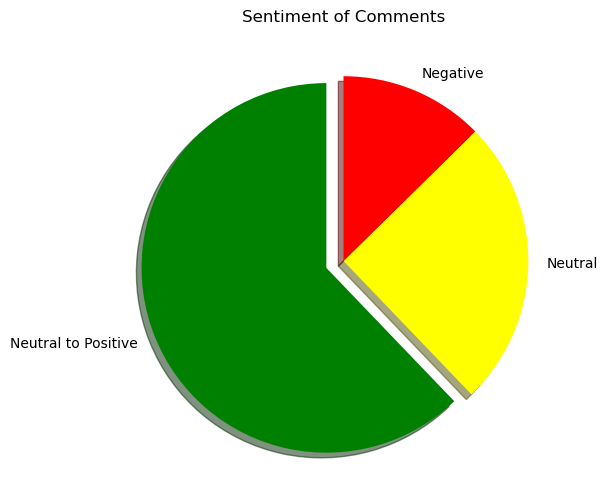

In [167]:
labels = 'Neutral to Positive', 'Neutral', 'Negative'
sentiment_data = youtube_data['Sentiment'].value_counts().rename_axis('Sentiment').reset_index(name='mood_counts')

plt.figure(figsize=(6,6))
plt.pie(sentiment_data.mood_counts, labels=labels, startangle=90, shadow=True, explode=[0.1, 0.0, 0.0], colors=['green', 'yellow', 'red'])
plt.title('Sentiment of Comments')
plt.show()

Additionally, I wanted to see how many people "liked" the different kinds of comments left. Once again, the column originally had numerical values. The 0.0 comments were negative comments, 1.0 comments were neutral, and 2.0 were neutral (or neutral to positive as I have labeled it for my purposes). I suspected that the comment likes would reflect the same trend that the comments did, meaning that 2.0 sentiment comments would receive more likes than 0.0 sentiment comments. That appears to be the case.

Although interestingly, more 1.0 (neutral) comments were left under the various videos, but those comments accounted for the least number of likes. I would surmise that is because often times people don't feel the need to "like" a comment that doesn't trigger an emotional reaction from them like a more positive comment or a negative one would.

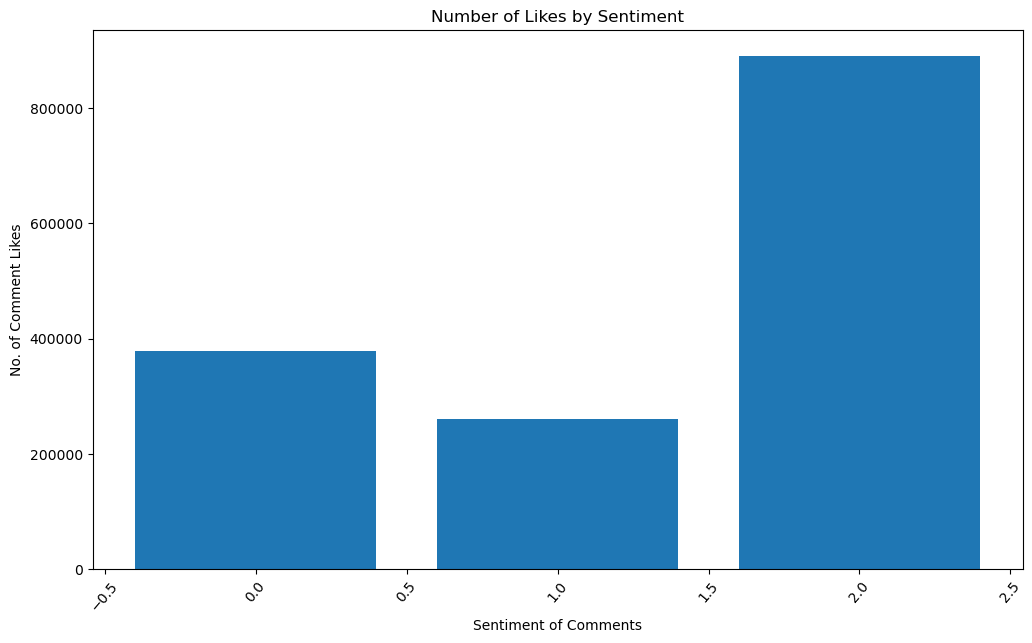

In [168]:
plt.figure(figsize=(12,7)) 
plt.bar(x=youtube_data['Sentiment'], height=youtube_data['Comment Likes'])
plt.xticks(rotation=50)
plt.title('Number of Likes by Sentiment')
plt.xlabel("Sentiment of Comments")
plt.ylabel("No. of Comment Likes")
plt.show()

# **Measuring the Topics of Videos** #

I wanted to analyze the popularity of different topics of videos. To do so, I began by creating a bar chart that shows the number of views a topic received. I had no hypotheses regarding what topics would be the most popular, but I assumed it would be a more general topic than some of the more niche ones like ASMR and mukbang videos.

Originally, I did have an issue with the y axis of the chart. It defaulted to a scientific notation. To remedy that, I changed the style format of the y axis to plain and that solved the issue.

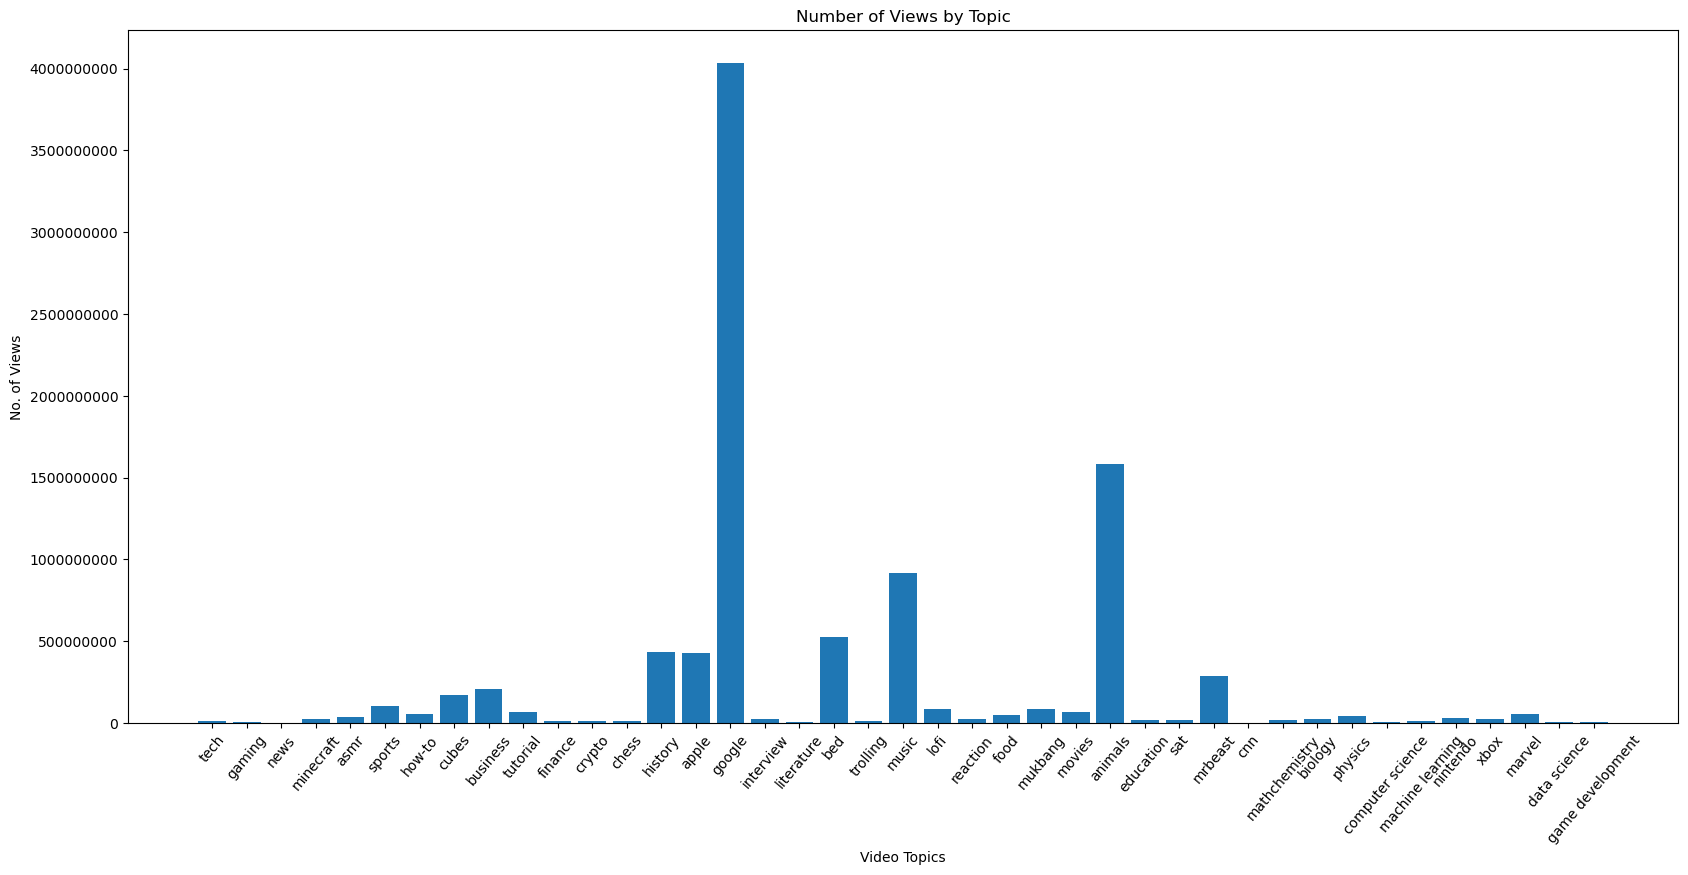

In [169]:

plt.figure(figsize=(20,9)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['Views'])
plt.xticks(rotation=50)
plt.ticklabel_format(axis="y", style='plain')
plt.title('Number of Views by Topic')
plt.xlabel("Video Topics")
plt.ylabel("No. of Views")
plt.show()

After measuring the popularity of video topics, I wanted to determine how many comments the various topics received across different videos. I suspected that perhaps the more popular topics would receive more comments. I created another bar chart to measure the number of comments received by topic. It was interesting to see that the most popular topic, which was Google, ended up receiving the majority of comments, but that the video topic Mr. Beast, a popular YouTuber, was low on views (comparatively speaking) and high on comments. This is likely because YouTube personalities like Mr. Beast might not get the same views as a generalized such as music or animals, but those personalities have loyal viewers. And those loyal viewers are seemingly more likely to comment on a video.

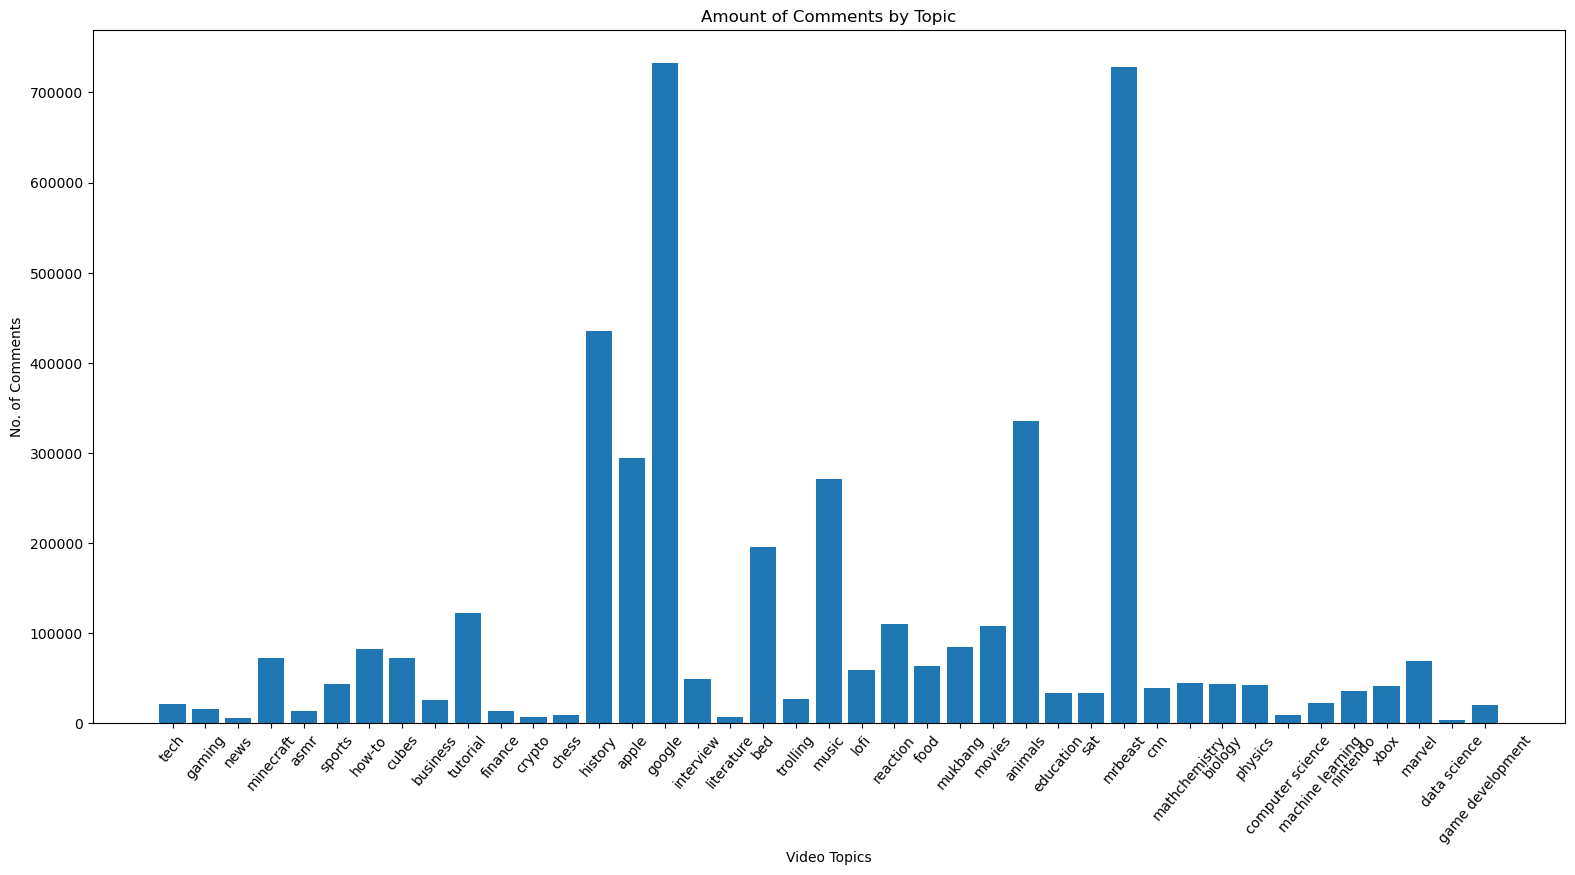

In [170]:
plt.figure(figsize=(19,9)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['# of Comments'])
plt.xticks(rotation=50)
plt.title('Amount of Comments by Topic')
plt.xlabel("Video Topics")
plt.ylabel("No. of Comments")
plt.show()

It was interesting to explore this subject. I have been a YouTube viewer for a long time and it was nice to see some of my theories held weight. Additionally, I enjoyed analyzing areas of the subject that I might not have previously thought much about.